In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [41]:
# Define parameters
N = 10  # Size of the cubic lattice (N x N x N)
J = 1.0  # Interaction strength
kB = 1.0  # Boltzmann constant

T_values = [2.5, 2.4, 2.3, 2.2, 2.1, 2.0, 1.9, 1.8, 1.7, 1.6, 1.54, 1.52, 1.50, 1.49, 1.48, 1.47, 1.46,
             1.45, 1.44, 1.43, 1.42, 1.41, 1.40, 1.39, 1.38, 1.37, 1.36, 1.34, 1.32, 1.30, 1.25, 1.20,
             1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

total_steps = 10**6
equilibration_steps = total_steps/10

start_save_config = total_steps - 1000

progress = 0

In [42]:
# Function to initialize the lattice with random unit vectors
def initialize_lattice(N):
    lattice = np.random.rand(N, N, N, 3) * 2 - 1.0  # Random values in [-1.0, 1.0]
    lattice /= np.linalg.norm(lattice, axis=-1, keepdims=True)
    return lattice

In [43]:
# Function to get the neighbors of a spin
def get_neighbors(lattice, i, j, k):
    neighbors = []
    for di, dj, dk in [(-1, 0, 0), (1, 0, 0), (0, -1, 0), (0, 1, 0), (0, 0, -1), (0, 0, 1)]:
        ni, nj, nk = (i + di) % N, (j + dj) % N, (k + dk) % N  # Apply periodic boundary conditions
        neighbors.append(lattice[ni, nj, nk])
    return neighbors

In [44]:
# Function to calculate the energy of a spin and its neighbors
def calculate_energy(spin, neighbors):
    neighbor_sum = np.sum(neighbors, axis=0)
    energy = -J * np.dot(spin, neighbor_sum)
    return energy

In [45]:
# Function to calculate the magnetization magnitude of the lattice
def calculate_magnetization(lattice):
    magnetization = [0.0, 0.0, 0.0]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                # Access the lattice element at position (i, j, k)
                magnetization[0] += lattice[i, j, k, 0]
                magnetization[1] += lattice[i, j, k, 1]
                magnetization[2] += lattice[i, j, k, 2]

    magnitude = magnetization[0]*magnetization[0] + magnetization[1]*magnetization[1] + magnetization[2]*magnetization[2]
    magnitude = np.sqrt(magnitude)
    magnitude = magnitude/(N**3)
    return magnitude

In [46]:
# Function to perform a Metropolis update
def metropolis_update(lattice, temperature):
    global acc_rate

    i, j, k = np.random.randint(0, N, size=3)
    spin = lattice[i, j, k]
    neighbors = get_neighbors(lattice, i, j, k)
    
    # Calculate energy before the update
    energy_before = calculate_energy(spin, neighbors)
    
    # Propose a new spin configuration
    new_spin = (np.random.rand(3) * 2 - 1.0)  # Random values between -1.0 and 1.0 for each component
    new_spin /= np.linalg.norm(new_spin)

    # Calculate energy after the update
    energy_after = calculate_energy(new_spin, neighbors)
    
    # Calculate energy difference
    delta_energy = energy_after - energy_before
    
    # Metropolis acceptance criteria
    if delta_energy <= 0 or np.random.rand() < np.exp(-delta_energy / (kB * temperature)):
        lattice[i, j, k] = new_spin
        acc_rate += 1

In [47]:
# Function to save Configurations as an .npy file (Only the X Components)
def save_configuration_X(config, temperature, step, lattice_size):
    folder_name = f"{lattice_size}X{lattice_size}X{lattice_size}_Steps{total_steps}/{temperature:.2f}/X_Comp"
    file_name = f"X_ConfigFile_Size{lattice_size}x{lattice_size}x{lattice_size}_M0.00_T{temperature:.2f}_StepNum{step}.npy"
    folder_path = os.path.join(os.getcwd(), folder_name)
    file_path = os.path.join(folder_path, file_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    np.save(file_path, config)

In [48]:
# Function to save Configurations as an .npy file (Only the Y Components)
def save_configuration_Y(config, temperature, step, lattice_size):
    folder_name = f"{lattice_size}X{lattice_size}X{lattice_size}_Steps{total_steps}/{temperature:.2f}/Y_Comp"
    file_name = f"Y_ConfigFile_Size{lattice_size}x{lattice_size}x{lattice_size}_M0.00_T{temperature:.2f}_StepNum{step}.npy"
    folder_path = os.path.join(os.getcwd(), folder_name)
    file_path = os.path.join(folder_path, file_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    np.save(file_path, config)

In [49]:
# Function to save Configurations as an .npy file (Only the Z Components)
def save_configuration_Z(config, temperature, step, lattice_size):
    folder_name = f"{lattice_size}X{lattice_size}X{lattice_size}_Steps{total_steps}/{temperature:.2f}/Z_Comp"
    file_name = f"Z_ConfigFile_Size{lattice_size}x{lattice_size}x{lattice_size}_M0.00_T{temperature:.2f}_StepNum{step}.npy"
    folder_path = os.path.join(os.getcwd(), folder_name)
    file_path = os.path.join(folder_path, file_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    np.save(file_path, config)

In [50]:
# Function to save the lattice as an .npy file
def save_lattice(lattice, temperature, step, lattice_size):
    folder_name = f"{lattice_size}X{lattice_size}X{lattice_size}_Steps{total_steps}/{temperature:.2f}/Lattice"
    file_name = f"LatticeFile_Size{lattice_size}x{lattice_size}x{lattice_size}_T{temperature:.2f}_StepNum{step}.npy"
    folder_path = os.path.join(os.getcwd(), folder_name)
    file_path = os.path.join(folder_path, file_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    np.save(file_path, lattice)

In [51]:
# Function to perform the Monte Carlo simulation
def monte_carlo_simulation(lattice, temperature, equilibration_steps, total_steps):
    magnetization_values = []

    for step in range(total_steps):
        metropolis_update(lattice, temperature)
        
        if step >= equilibration_steps and (step - equilibration_steps) % (total_steps // 100) == 0:
            # Calculate magnetization and save measurements
            magnetization = calculate_magnetization(lattice)
            magnetization_values.append(magnetization)
        
        if step >= start_save_config:
            x_components = lattice[:, :, :, 0]  # Extract x components (index 0)
            y_components = lattice[:, :, :, 1]  # Extract y components (index 1)
            z_components = lattice[:, :, :, 2]  # Extract z components (index 2)
            save_configuration_X(x_components,temperature,step,N)
            save_configuration_Y(y_components,temperature,step,N)
            save_configuration_Z(z_components,temperature,step,N)

            # Save the lattice as well
            save_lattice(lattice, temperature, step, N)

    # Calculate average magnetization and error bar
    avg_magnetization = np.mean(magnetization_values)
    error_bar = np.std(magnetization_values) / np.sqrt(len(magnetization_values))
    # Calculating magnetic susceptibility
    Chi = (np.var(magnetization_values))/temperature

    # Return average magnetization, error bar
    return avg_magnetization, error_bar, Chi

In [52]:
# Main simulation loop
global lattice
lattice = initialize_lattice(N)

avg_magnetizations = []
error_bars = []
susceptibility_values = []

file_name_ = f"simulation_results_{N}X{N}X{N}_Steps{total_steps}.txt" 
file = open(file_name_ , 'w')

for T in T_values:
    acc_rate = 0
    avg_mag, error, Chi = monte_carlo_simulation(lattice, T, equilibration_steps, total_steps)
    avg_magnetizations.append(avg_mag)
    error_bars.append(error)
    susceptibility_values.append(Chi)

    progress = progress + 1
    num_of_temp = len(T_values)
    print(f"{progress:02d}/{num_of_temp} - Temperature: {T:.2f}, Magnetization: {avg_mag:.8f}, Error: {error:.8f}, Susceptibility: {Chi:.8f}, Acc_Rate: {acc_rate}")


    line = f"Temperature: {T:.2f}, Magnetization: {avg_mag:.8f}, Error: {error:.8f}, Susceptibility: {Chi:.8f}, Acc_Rate: {acc_rate}\n"
    sys.stdout.flush()  # Force flushing the output buffer

    file.write(line)
    file.flush()  # Force flushing the file buffer

file.close()

01/43 - Temperature: 2.50, Magnetization: 0.05485376, Error: 0.00232128, Susceptibility: 0.00019398, Acc_Rate: 694644
02/43 - Temperature: 2.40, Magnetization: 0.05438950, Error: 0.00241079, Susceptibility: 0.00021795, Acc_Rate: 683216
03/43 - Temperature: 2.30, Magnetization: 0.05440685, Error: 0.00219328, Susceptibility: 0.00018824, Acc_Rate: 669599
04/43 - Temperature: 2.20, Magnetization: 0.06003669, Error: 0.00282579, Susceptibility: 0.00032666, Acc_Rate: 654004
05/43 - Temperature: 2.10, Magnetization: 0.06535647, Error: 0.00295739, Susceptibility: 0.00037483, Acc_Rate: 636389
06/43 - Temperature: 2.00, Magnetization: 0.06528811, Error: 0.00294422, Susceptibility: 0.00039008, Acc_Rate: 616306
07/43 - Temperature: 1.90, Magnetization: 0.07539292, Error: 0.00311450, Susceptibility: 0.00045948, Acc_Rate: 595572
08/43 - Temperature: 1.80, Magnetization: 0.09517039, Error: 0.00422919, Susceptibility: 0.00089430, Acc_Rate: 570615
09/43 - Temperature: 1.70, Magnetization: 0.10183323, Er

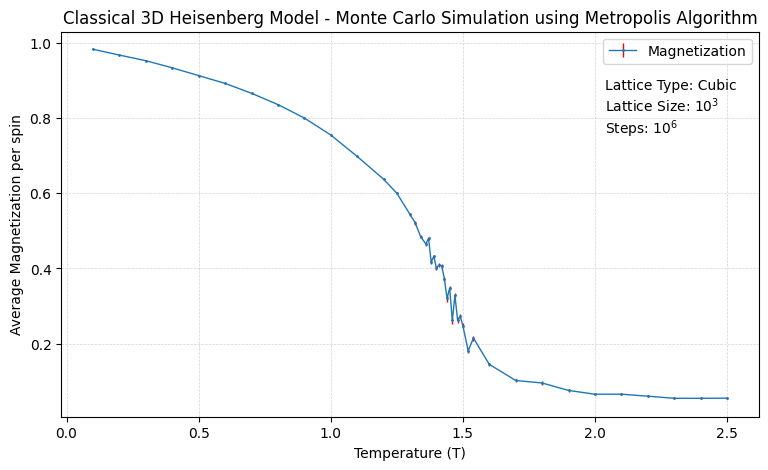

In [53]:
# Set plot size and create the figure
fig, ax = plt.subplots(figsize=(9, 5))

# Ensure error_bars has the same number of elements as T_values
error_bars = error_bars[:len(T_values)]

# Plot results with error bars and lines
plt.errorbar(T_values, avg_magnetizations, yerr=error_bars, fmt='o-', label='Magnetization', 
             ecolor='red', markersize=1, elinewidth=1, linewidth=1)
plt.xscale('linear')  # Set the x-axis scale to linear
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization per spin')

# Add legend
legend = plt.legend()

power = int(np.log10(total_steps))
# Create the lattice_info string with dynamic steps value
lattice_info = f'Lattice Type: Cubic\nLattice Size: ${N}^3$\nSteps: $10^{power}$'

plt.text(0.78, 0.8, lattice_info, transform=ax.transAxes, fontsize=10, ha='left', va='center')

# Set legend font size
legend.get_texts()[0].set_fontsize('10')

plt.title('Classical 3D Heisenberg Model - Monte Carlo Simulation using Metropolis Algorithm')

# Customize the grid
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Save the figure to a file (e.g., a PNG image)
file_name_image = f"Magnetization_vs_Temperature_Simulation_results_{N}X{N}X{N}_Steps{total_steps}.png" 
plt.savefig(file_name_image, dpi=300, bbox_inches='tight')

plt.show()


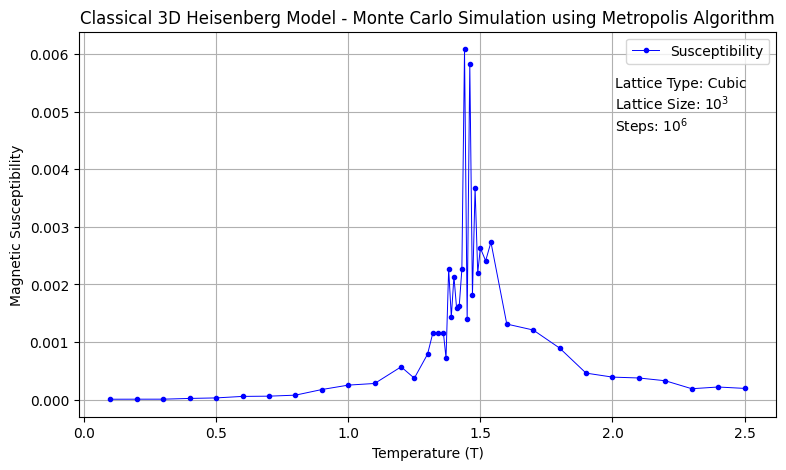

In [54]:
# Plot magnetic susceptibility vs temperature
plt.figure(figsize=(9, 5))
plt.plot(T_values, susceptibility_values, 'o-', label='Susceptibility', color='blue', markersize=3, linewidth=0.7)
plt.xscale('linear')  # Set the x-axis scale to linear
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetic Susceptibility')
plt.legend()

lattice_info = f'Lattice Type: Cubic\nLattice Size: ${N}^3$\nSteps: $10^{power}$'

plt.text(0.72, 0.8, lattice_info, transform=ax.transAxes, fontsize=10, ha='left', va='center')

# Set legend font size
legend.get_texts()[0].set_fontsize('10')


plt.title('Classical 3D Heisenberg Model - Monte Carlo Simulation using Metropolis Algorithm')
plt.grid(True)

# Save the figure to a file (e.g., a PNG image)
file_name_image = f"Susceptibility_vs_Temperature_Simulation_results_{N}X{N}X{N}_Steps{total_steps}.png" 
plt.savefig(file_name_image, dpi=300, bbox_inches='tight')

plt.show()